# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria para material de estudo)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Imports

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns

### DataFrame

In [80]:
dados = pd.read_csv('dados.csv')

In [81]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Dicionários para melhor visualização de tabelas e gráficos

In [82]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

### Considerando as seguintes classes em salários mínimos (SM):

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Obs: Salário mínimo na época da pesquisa era de: <b>R$ 788,00</b>

### Intevalos das classes em reais (R$)

In [83]:
salario = 788
classes = [dados.Renda.min(), 
           salario*2, 
           salario*5, 
           salario*15, 
           salario*25, 
           dados.Renda.max()]

### Labels das classes

In [84]:
labels = ['E', 'D', 'C', 'B', 'A']

### Tabela de frequência e percentual

In [85]:
# Frequência
classes_cut = pd.cut(x = dados.Renda,
                     bins = classes,
                     labels = labels,
                     include_lowest = True)
frequencia_classes = pd.value_counts(classes_cut)

# Percentual
percentual_classes = pd.value_counts(classes_cut, normalize=True) * 100
percentual_classes = percentual_classes.round(2)

# Tabela
dist_freq_renda = pd.DataFrame({'Frequência': frequencia_classes, 'Porcentagem (%)': percentual_classes})
dist_freq_renda = dist_freq_renda.sort_index(ascending=False)
dist_freq_renda

,Frequência,Porcentagem (%)
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


### Gráfico de barras da tabela de frequências acima

<AxesSubplot:>

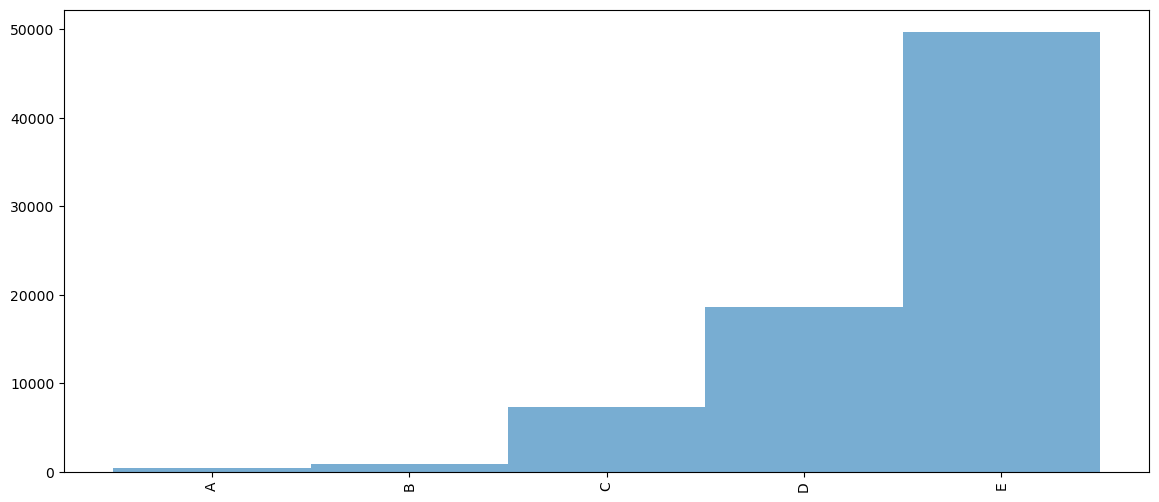

In [86]:
dist_freq_renda['Frequência'].plot.bar(width=1, alpha=0.6, figsize=(14,6))

> ### Conclusões

A distribuição das famílias brasileiras nas classes sociais revela uma realidade de desigualdade socioeconômica. A maioria (64.75%) pertence à classe E, de renda mais baixa, enquanto 24.21% estão na classe D, intermediária. As classes C, B e A, representando renda mais alta, totalizam apenas 11.04% das famílias, o que evidencia a pequena proporção da população nessa faixa. Essa disparidade ressalta a necessidade de políticas públicas para reduzir a desigualdade e melhorar as condições de vida das famílias de renda mais baixa. A presença limitada de uma classe média e alta destaca a importância de abordar as desigualdades e promover a inclusão social no Brasil.

### Histograma de Idade

C:\Users\paulo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - IDADE'}, xlabel='Anos', ylabel='Density'>

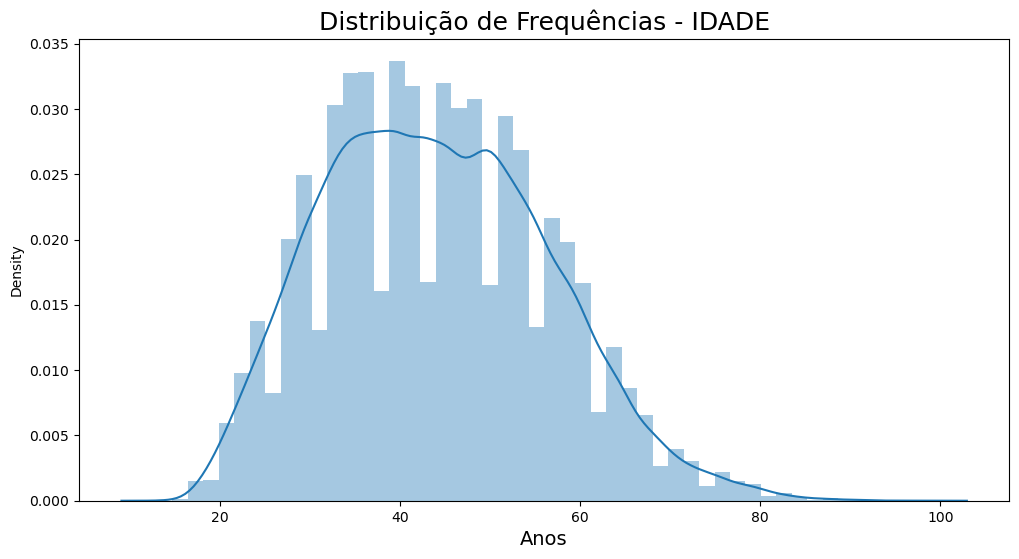

In [87]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - IDADE', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

> ### Conclusões

Observamos que a maioria dos participantes da pesquisa encontra-se na faixa etária entre 30 e 50 anos. Isso se deve, geralmente, ao fato de ser o(a) responsável pela família quem responde ao questionário. Além disso, notamos uma baixa representatividade de respostas provenientes de indivíduos com menos de 20 anos ou com mais de 80 anos. Esses casos são, provavelmente, exceções em que pessoas nessas faixas etárias atuaram como representantes familiares ou responderam em substituição ao(a) representante.

### Histograma de Renda

C:\Users\paulo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - RENDA'}, xlabel='R$', ylabel='Density'>

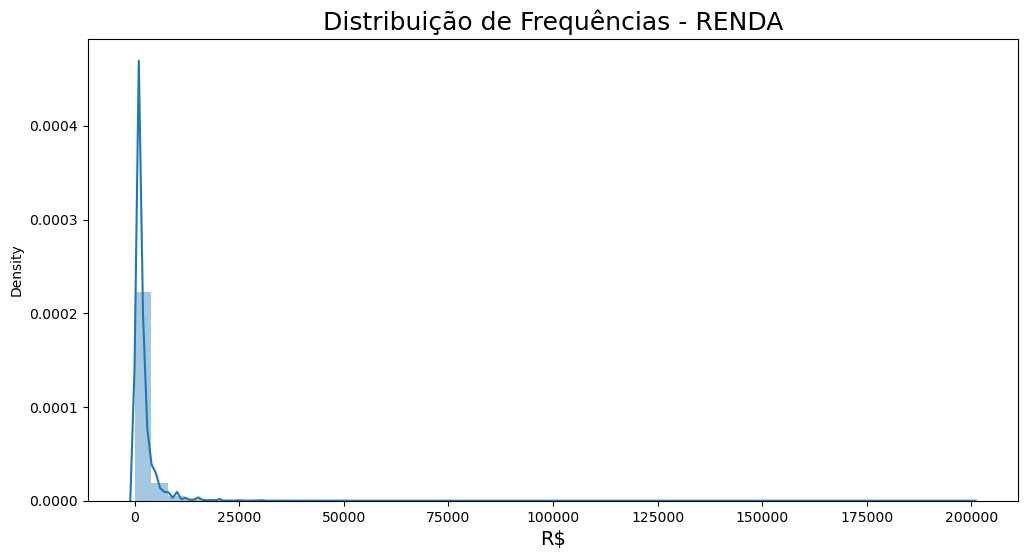

In [88]:
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Podemos observar nitidamente a desigualdade de renda que existia no Brasil em 2015. A imensa maioria da população recebia apenas um salário mínimo de 788,00 reais, enquanto algumas pessoas recebiam um pouco acima desse valor, o qual diminuía gradualmente até atingir os 25.000,00 reais. A partir desse ponto, apenas um número muito reduzido de indivíduos recebia salários superiores a esse patamar.

### Histograma de Altura

C:\Users\paulo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - ALTURA'}, xlabel='Metros', ylabel='Density'>

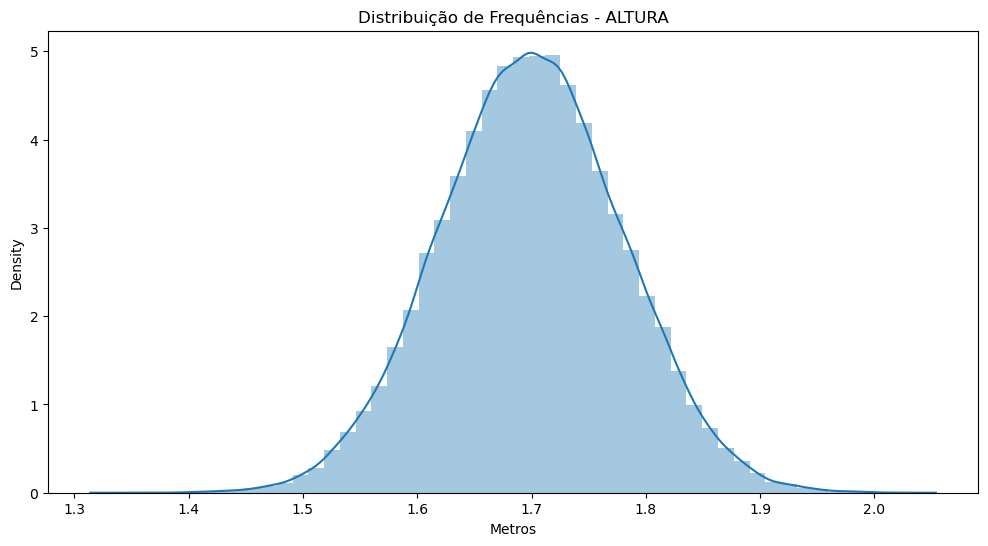

In [89]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - ALTURA')
ax.set_xlabel('Metros')
ax

> ### Conclusões

Obs: Essa é uma variável criada artificialmente para fins de estudo.
Contudo, podemos notar uma distribuição simétrica com um pico em torno de 1,7 metros de altura. Isso significa que a maioria das pessoas que participaram da pesquisa possuem uma altura próxima a 1,7 metros, e a quantidade de indivíduos diminui gradualmente em direção aos extremos. Há um número muito reduzido de pessoas com menos de 1,4 metros ou mais de 2,0 metros de altura.


### Histograma de RENDA até R$ 20.000,00

C:\Users\paulo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - RENDA - Renda até R$ 20.000,00'}, xlabel='R$', ylabel='Density'>

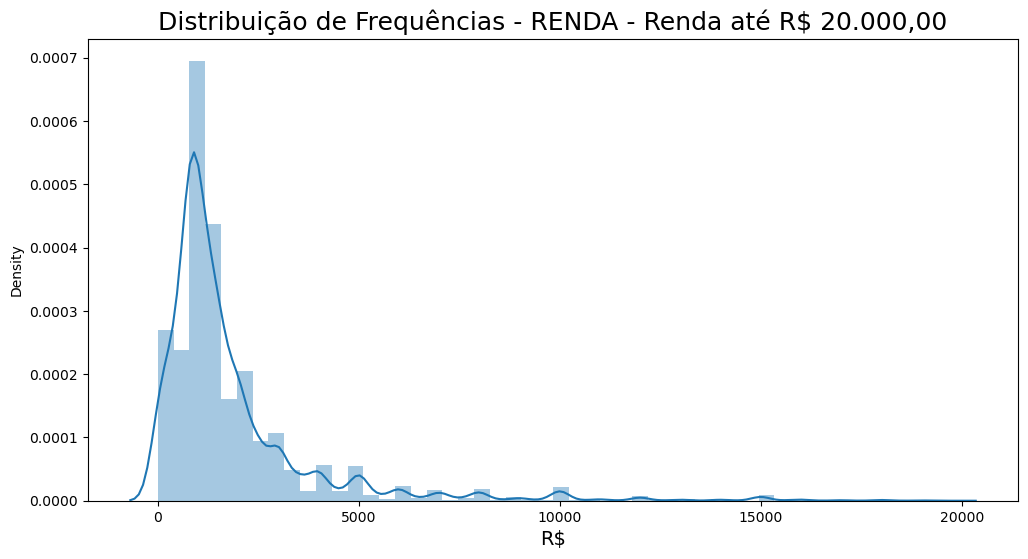

In [90]:
# Renda < 20000
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - RENDA - Renda até R$ 20.000,00', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

### Tabela de Frequência (SEXO x COR)

In [91]:
# Tabela de Frequência
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


### Tabela de Porcentagem (SEXO x COR)

In [92]:
# Tabela de Porcentagem
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize=True)
percentual = (percentual * 100).round(2)
percentual.rename(index=sexo, columns=cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> ### Conclusões

A proporção de homens brancos e pardos é maior do que a de mulheres nessas categorias. Da mesma forma, a presença de homens pretos e indígenas é maior do que a presença de mulheres nessas categorias. Essas discrepâncias podem indicar desigualdades sociais e de representatividade dentro da amostra pesquisada.


### Análise Descritiva de RENDA

#### Média aritimética; Mediana; Moda; Desvio médio absoluto; Variância; Desvio padrão

In [93]:
media = dados.Renda.mean()
mediana = dados.Renda.median()
moda = dados.Renda.mode()[0]
mad = dados.Renda.mad()
var = dados.Renda.var()
std = dados.Renda.std()

print(f'Média aritimética: {media:.2f}\n\
Mediana: {mediana:.2f}\n\
Moda: {moda:.2f}\n\
Desvio médio absoluto: {mad:.2f}\n\
Variância: {var:.2f}\n\
Desvio padrão: {std:.2f}')

Média aritimética: 2000.38
Mediana: 1200.00
Moda: 788.00
Desvio médio absoluto: 1526.50
Variância: 11044906.01
Desvio padrão: 3323.39


### Média, mediana e valor máximo de RENDA segundo SEXO e COR

In [94]:
renda_estatistica_sexo_cor = pd.crosstab(dados.Cor,
                                         dados.Sexo,
                                         values = dados.Renda,
                                         aggfunc = {'mean', 'median', 'max'})
renda_estatistica_sexo_cor.rename(index=cor, columns=sexo, inplace=True)
renda_estatistica_sexo_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Das pessoas que responderam à pesquisa:
A renda máxima é mais alta para homens em todas as categorias raciais.
A renda média e mediana é geralmente mais alta para homens em comparação com mulheres.
Homens brancos têm a maior renda média e mediana, seguidos por homens de cor amarela, indígena, parda e preta.
Mulheres brancas têm a maior renda média e mediana, seguidas por mulheres de cor amarela, indígena, parda e preta.
Há uma disparidade de gênero na renda, com homens tendo rendas mais altas do que mulheres.
Pessoas brancas tendem a ter rendas mais altas em comparação com outras categorias raciais.

### Medidas de dispersão da variável RENDA segundo SEXO e COR

In [95]:
renda_dispersao_sexo_cor = pd.crosstab(dados.Cor,
                                       dados.Sexo,
                                       values = dados.Renda,
                                       aggfunc = {'mad', 'var', 'std'}).round(2)
renda_dispersao_sexo_cor.rename(index=cor, columns=sexo, inplace=True)
renda_dispersao_sexo_cor

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

Os dados mostram que, em média, os valores são mais altos para o sexo masculino em comparação ao sexo feminino em todas as categorias. Além disso, os valores para o sexo feminino tendem a ter uma maior variabilidade e dispersão em relação ao sexo masculino, como indicado pelo desvio padrão e variância mais altos. 

### Box-plot de RENDA segundo SEXO e COR (Renda <  R$ 10.000)

<AxesSubplot:title={'center':'Box-plot Renda x Cor & Sexo'}, xlabel='R$', ylabel='Cor'>

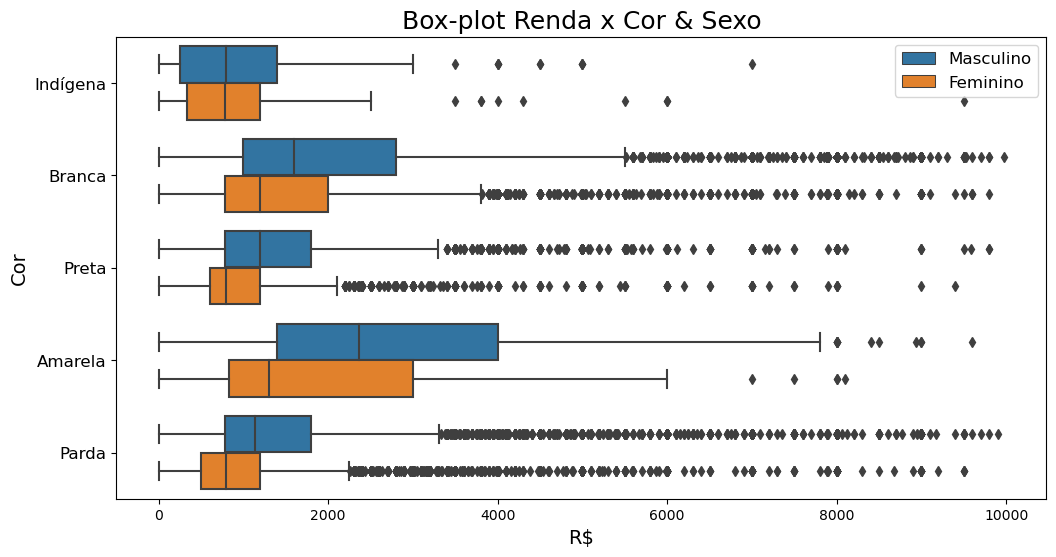

In [96]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query('Renda < 10000'), orient='h')
# tamanho
ax.figure.set_size_inches(12,6)
# título
ax.set_title('Box-plot Renda x Cor & Sexo', fontsize=18)
# label X
ax.set_xlabel('R$', fontsize=14)
# label Y
ax.set_ylabel('Cor', fontsize=14)
# tick labels y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize=12)
# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
#
ax

> ### Conclusões

Claramente, a renda das pessoas indígenas é comumente significativamente inferior em relação às demais. As pessoas de cor preta e parda tendem a possuir uma renda superior às indígenas, porém ainda inferior às pessoas de cor branca e amarela. Além disso, há uma diferença bastante evidente na renda entre homens e mulheres, sendo que a renda das mulheres é substancialmente inferior. Podemos ressaltar também que, embora ainda exista, a diferença de renda entre mulheres e homens indígenas é menor do que entre outras cores.

### Percentual de pessoas que ganham um salário mínimo ou menos

In [97]:
from scipy import stats

percent_menos_um_salario = stats.percentileofscore(dados.Renda, 
                                                  salario, 
                                                  kind='weak', 
                                                  nan_policy='omit')
print(f'{percent_menos_um_salario:.2f}%')

28.87%


### Valor máximo ganho por 99% das pessoas

In [98]:
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


Somente 1% das pessoas ganham mais de R$ 15.000,00

### Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [99]:
# tabela
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(dados['Anos de Estudo'],
                                                   dados.Sexo, 
                                                   values = (dados.Renda),
                                                   aggfunc = ['mean', 'median', 'max', 'std']).round(2)
# renomeando index e colunas
renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, columns = sexo, inplace = True)
# visualizando
renda_estatisticas_por_sexo_e_estudo

mean             median           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano    799.49   516.20       700      390   
1 ano                             895.63   492.77       788      400   
2 anos                            931.18   529.91       788      450   
3 anos                           1109.20   546.85       800      500   
4 anos                           1302.33   704.28      1000      788   
5 anos                           1338.65   781.39      1045      788   
6 anos                           1448.88   833.73      1200      788   
7 anos                           1465.50   830.75      1200      788   
8 anos                           1639.40   933.62      1300      800   
9 anos                           1508.04   868.02      1200      788   
10 anos                          1731.27   925.92      1218      800   
11 anos                          2117.06  1286.79      1500     1000   
12 anos                          2470.33  1682.31      1800     1200   
13 anos                          3195.10  1911.73      2400     1300   
14 anos                          3706.62  2226.46      2500     1600   
15 anos ou mais                  6134.28  3899.51      4000     2800   
Não determinados                 1295.76   798.17      1200      788   

                                     max                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     30000    10000   1023.90   639.31  
1 ano                              30000     2000   1331.95   425.29  
2 anos                             40000     4000   1435.17   498.23  
3 anos                             80000     3500   2143.80   424.12  
4 anos                             50000    10000   1419.82   629.55  
5 anos                             35000     8000   1484.65   635.78  
6 anos                             25000     6000   1476.63   574.55  
7 anos                             40000     9000   1419.71   602.04  
8 anos                             30000    18000   1515.58   896.78  
9 anos                             60000    20000   2137.66   973.22  
10 anos                            45000     6000   2078.61   620.61  
11 anos                           200000   100000   2676.54  1819.04  
12 anos                            30000   120000   2268.08  4851.83  
13 anos                            25000    20000   2797.12  2053.79  
14 anos                            50000    20000   3987.21  2064.08  
15 anos ou mais                   200000   100000   7447.61  4212.77  
Não determinados                    7000     3000    979.65   459.99

A renda média aumenta gradualmente com os anos de estudo.

Médias do sexo masculino sempre maiores que do feminino.

Desvio padrão muito grande em 15 anos ou mais de estudo.

### Box plot de RENDA segundo ANOS DE ESTUDO e SEXO 
### (renda abaixo de R$ 10.000,00 e 50 anos de Idade)

<AxesSubplot:title={'center':'Box-plot Renda segundo Anos de Estudo e Sexo'}, xlabel='R$', ylabel='Anos de Estudo'>

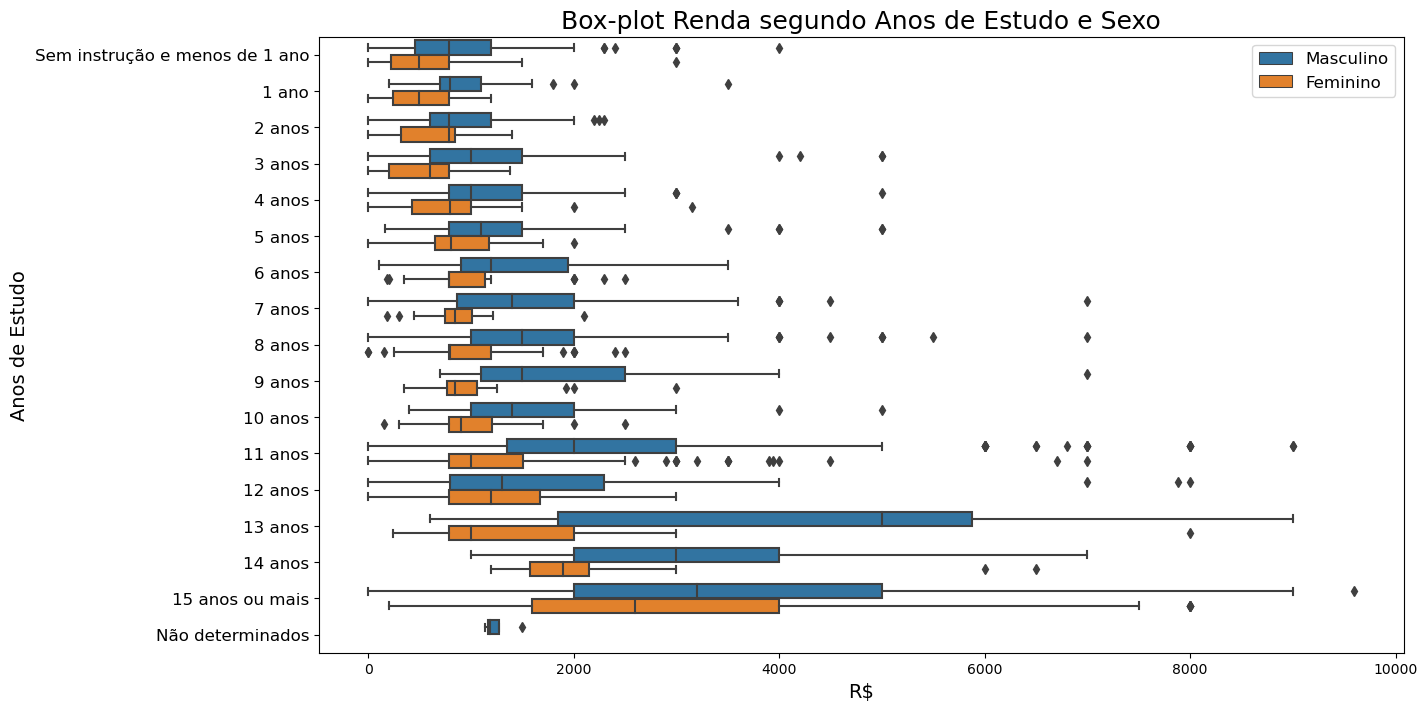

In [100]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', 
                 data=dados.query('Renda < 10000 and Idade == 50'), orient='h')
# tamanho
ax.figure.set_size_inches(14,8)
# titulo
ax.set_title('Box-plot Renda segundo Anos de Estudo e Sexo', fontsize = 18)
# label x
ax.set_xlabel('R$', fontsize = 14)
# label y
ax.set_ylabel('Anos de Estudo', fontsize = 14)
# ticklabel y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)
# legenda
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

ax

> ### Conclusões

Para pessoas com 50 anos de idade:

Claramente que o padrão é, quanto mais anos de estudo mais renda.

Há uma grande descrepancia entre homens e mulheres quando em 13 anos de estudo.

Mulheres tem um padrão de renda bem superior quando atingem 15 anos ou mais de estudo.

A diferença de 0 para 1 ano de estudo é quase nula.

### Média, mediana, valor máximo e desvio-padrão de RENDA por Estado

In [101]:
# tabela
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']}).round(2)
# renomeando index
renda_estatisticas_por_uf.rename(index=uf, inplace=True)
renda_estatisticas_por_uf

Renda                         
                        mean  median     max      std
UF                                                   
Rondônia             1789.76  1200.0   50000  2406.16
Acre                 1506.09   900.0   30000  2276.23
Amazonas             1445.13   900.0   22000  1757.94
Roraima              1783.59  1000.0   20000  2079.66
Pará                 1399.08   850.0   50000  2053.78
Amapá                1861.35  1200.0   15580  2020.69
Tocantins            1771.09  1000.0   60000  2934.59
Maranhão             1019.43   700.0   30000  1887.82
Piauí                1074.55   750.0   40000  2373.36
Ceará                1255.40   789.0   25000  1821.96
Rio Grande do Norte  1344.72   800.0   15500  1651.81
Paraíba              1293.37   788.0   30000  1950.27
Pernambuco           1527.08   900.0   50000  2389.62
Alagoas              1144.55   788.0   11000  1237.86
Sergipe              1109.11   788.0   16000  1479.00
Bahia                1429.65   800.0  200000  3507.92
Minas Gerais         2056.43  1200.0  100000  3584.72
Espírito Santo       2026.38  1274.0  100000  3513.85
Rio de Janeiro       2496.40  1400.0  200000  5214.58
São Paulo            2638.10  1600.0   80000  3503.78
Paraná               2493.87  1500.0  200000  4302.94
Santa Catarina       2470.85  1800.0   80000  3137.65
Rio Grande do Sul    2315.16  1500.0   35000  2913.34
Mato Grosso do Sul   2262.60  1500.0   42000  3031.42
Mato Grosso          2130.65  1500.0   35000  2542.63
Goiás                1994.58  1500.0   30000  2221.93
Distrito Federal     4241.95  2000.0  100000  5550.46

### Box plot de RENDA por Estado (Renda menor ou igual a 10000)

<AxesSubplot:title={'center':'Box-plot Renda x Estados'}, xlabel='R$', ylabel='Estado'>

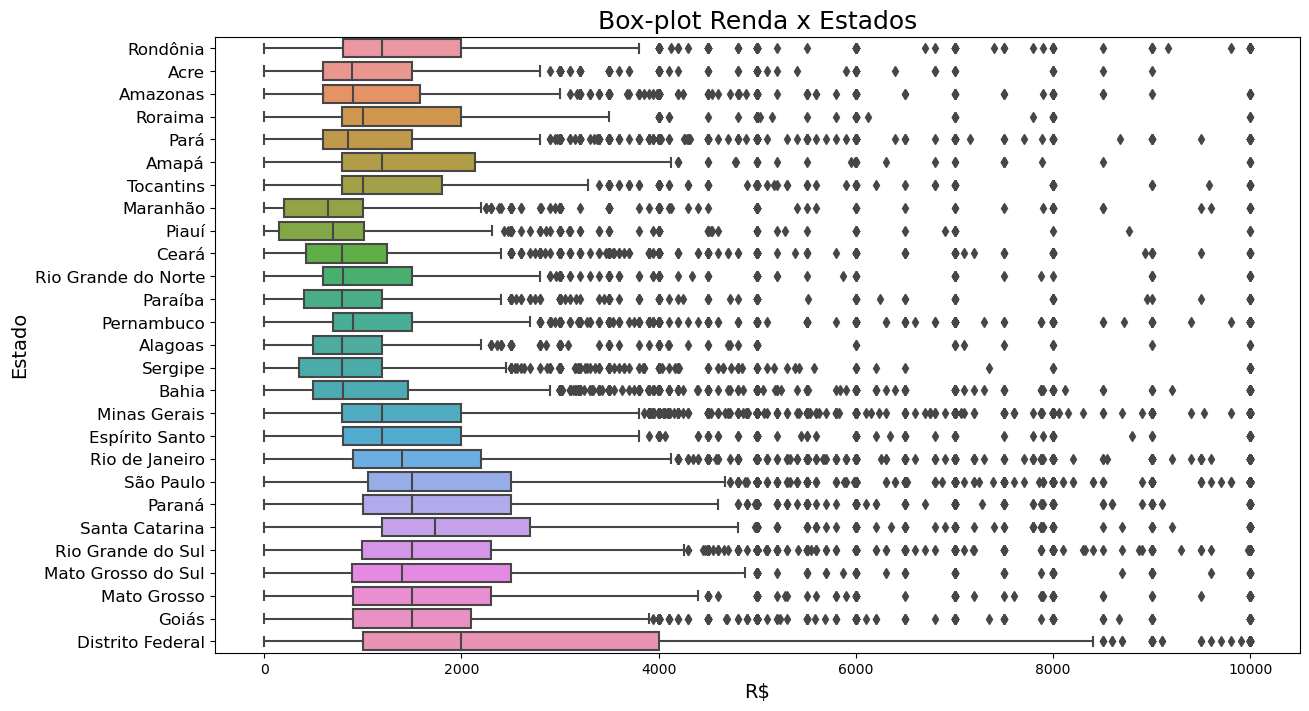

In [102]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda <= 10000'), orient = 'h')
# titulo
ax.set_title('Box-plot Renda x Estados', fontsize = 18)
# tamanho
ax.figure.set_size_inches(14,8)
# x label
ax.set_xlabel('R$', fontsize = 14)
# y label
ax.set_ylabel('Estado', fontsize = 14)
ax.set_yticklabels([key for key in uf.values()], fontsize = 12)
ax

> ### Conclusões

Claramente a renda no Distrito Federal é desproporcional aos outros estados, e também há uma desigualdade de renda muito alta.

Maranhão e Piauí são os que possuem o padrão de renda mais baixo.

Estados do Centro ao Sul do Brasil possuem maior renda comparado ao resto.